## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [1]:
import numpy as np
import keras
from keras.datasets import fashion_mnist  # наборы для работы
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

(train_imagesi,train_labels),(test_imagesi,test_labels)=fashion_mnist.load_data()

# Normalize the images.
train_imagesi = train_imagesi / 255.0
test_imagesi = test_imagesi / 255.0

# Flatten the images.
train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

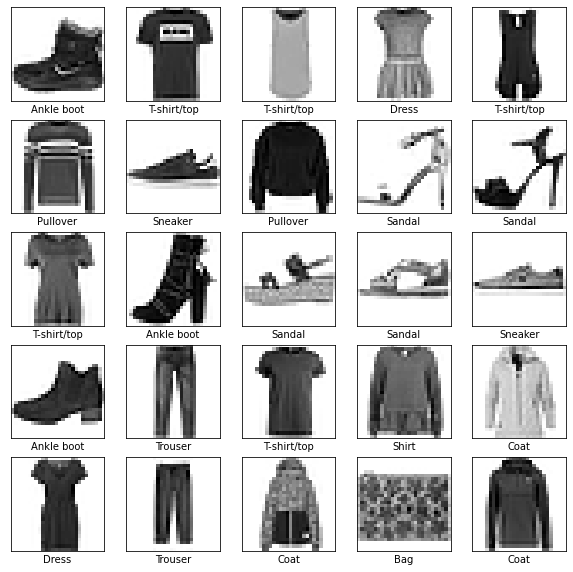

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_imagesi[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [4]:
y_t = to_categorical(train_labels)
y_tt = to_categorical(test_labels)

In [5]:
y_t[:3,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

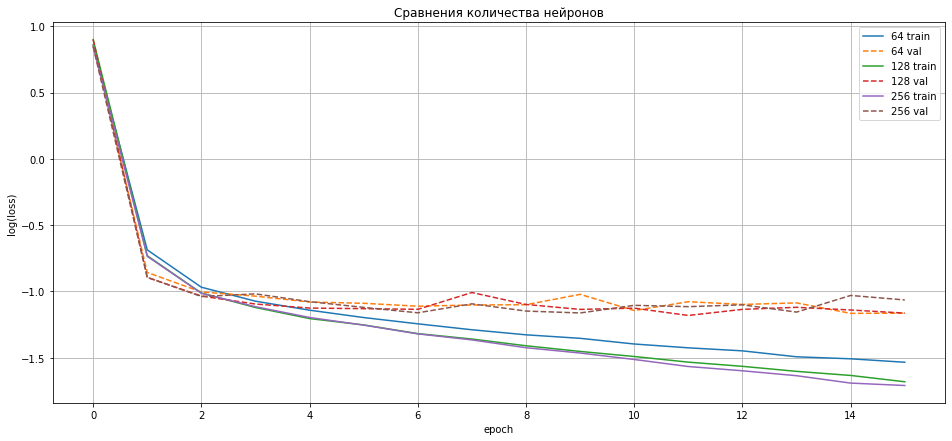

In [6]:
accuracy_di = {}

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для вывода результатов
epoch = np.arange(epochs+1)

# будем изменять количество нейронов
for i_optim in [ 64, 128, 256, ]:
  # создаем рабочую модель model_neuron
  model_neuron = Sequential([
                      Dense(i_optim, activation='relu', input_shape=(train_images.shape[1],)),
                      Dense(i_optim, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
  # загружаем веса modeli.load_weights('model.h5')
  #modeli.load_weights('model.h5')
  
  # компилируем modeli с одним из оптимизаторов
  model_neuron.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для modeli без обучения
  hh0_tr = model_neuron.evaluate(train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
  hh0_val = model_neuron.evaluate(train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
  # проводим обучение модели 
  hh = model_neuron.fit(
                  train_images,
                  to_categorical(train_labels),
                  epochs=epochs,
                  batch_size=32, validation_split=0.2, verbose = 0
                  )
  # картинки  
  units = str(model_neuron.get_config()['layers'][1]['config']['units'])
  
  plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = units+' train')
  plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = units+' val')

  max_acc = np.argmax(hh.history['val_accuracy'])
  accuracy_di[units+' neurons'] = np.round(hh.history['val_accuracy'][max_acc],2)
  
plt.legend()
plt.grid('On')

plt.title('Сравнения количества нейронов')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()


In [7]:
print(accuracy_di)

{'64 neurons': 0.89, '128 neurons': 0.9, '256 neurons': 0.89}


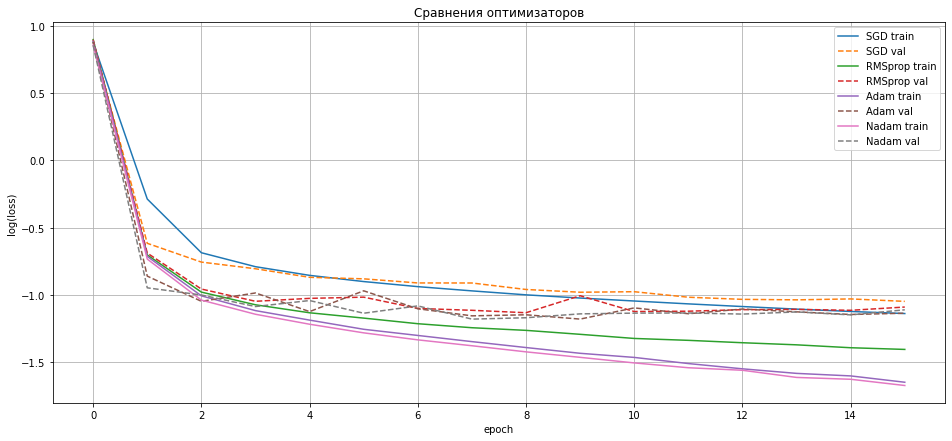

In [8]:
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы
for i_optim in ['SGD','RMSProp','adam','NAdam']:
  # создаем рабочую модель model_opti куда будем загружать эти вес (она должна быть идентичной структуры)
  model_opti = Sequential([
                      Dense(128, activation='relu', input_shape=(train_images.shape[1],)),
                      Dense(64, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
  # загружаем веса modeli.load_weights('model.h5')
  #modeli.load_weights('model.h5')
  # компилируем modeli с одним из оптимизаторов
  model_opti.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для modeli без обучения
  hh0_tr = model_opti.evaluate(train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
  hh0_val = model_opti.evaluate(train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
  # проводим обучение модели 
  hh = model_opti.fit(
                  train_images,
                  to_categorical(train_labels),
                  epochs=epochs,
                  batch_size=32, validation_split=0.2, verbose = 0
                  )
  # картинки
  plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = model_opti.optimizer.get_config()['name']+' train')
  plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = model_opti.optimizer.get_config()['name']+' val')
  
  max_acc = np.argmax(hh.history['val_accuracy'])
  accuracy_di[i_optim] = np.round(hh.history['val_accuracy'][max_acc],2)
  
plt.legend()
plt.grid('On')

plt.title('Сравнения оптимизаторов')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()


In [9]:
print(accuracy_di)

{'64 neurons': 0.89, '128 neurons': 0.9, '256 neurons': 0.89, 'SGD': 0.87, 'RMSProp': 0.89, 'adam': 0.89, 'NAdam': 0.89}


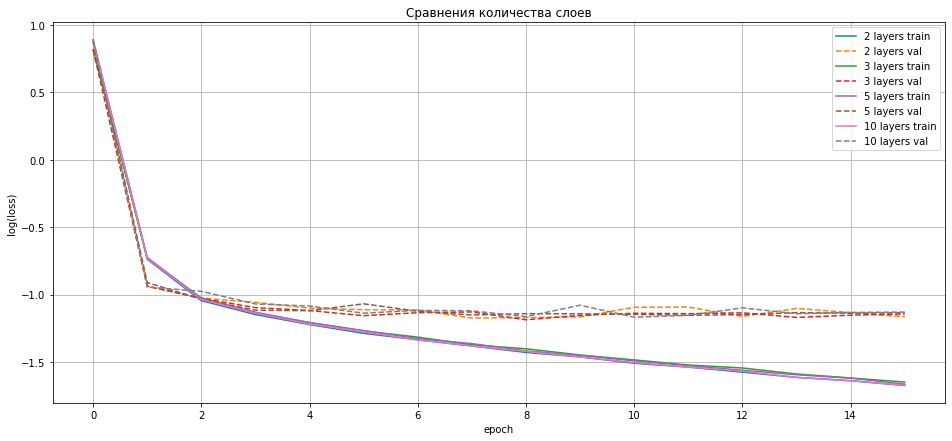

In [10]:
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы
for i_optim in [2, 3, 5, 10]:
  # создаем рабочую модель model_layer
  model_layer = Sequential(name="my_layers")
  model_layer.add(Dense(128, activation='relu', input_shape=(train_images.shape[1],)))
  for k in [i_optim]: 
     model_layer.add(Dense(64, activation='tanh'))
  model_layer.add(Dense(10, activation='softmax'))

  # загружаем веса modeli.load_weights('model.h5')
  #modeli.load_weights('model.h5')
  # компилируем modeli с одним из оптимизаторов
  model_layer.compile(
      optimizer='NAdam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для modeli без обучения
  hh0_tr = model_layer.evaluate(train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
  hh0_val = model_layer.evaluate(train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
  # проводим обучение модели 
  hh = model_layer.fit(
                  train_images,
                  to_categorical(train_labels),
                  epochs=epochs,
                  batch_size=32, validation_split=0.2, verbose = 0
                  )
  # картинки
  plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = str(i_optim)+' layers train')
  plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = str(i_optim)+' layers val')
  
  max_acc = np.argmax(hh.history['val_accuracy'])
  accuracy_di[str(i_optim)+' layers'] = np.round(hh.history['val_accuracy'][max_acc],2)
  
plt.legend()
plt.grid('On')

plt.title('Сравнения количества слоев')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()


In [11]:
print(accuracy_di)

{'64 neurons': 0.89, '128 neurons': 0.9, '256 neurons': 0.89, 'SGD': 0.87, 'RMSProp': 0.89, 'adam': 0.89, 'NAdam': 0.89, '2 layers': 0.89, '3 layers': 0.89, '5 layers': 0.89, '10 layers': 0.89}


Посмотрим на результат предсказаний  (inference) для обученной модели (последняя в цикле)

In [12]:
N = 15
y_pred = model_opti.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred, axis=1)

In [13]:
y_pred_opti = model_layer.predict(test_images[:N,:]                            )

In [14]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [15]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

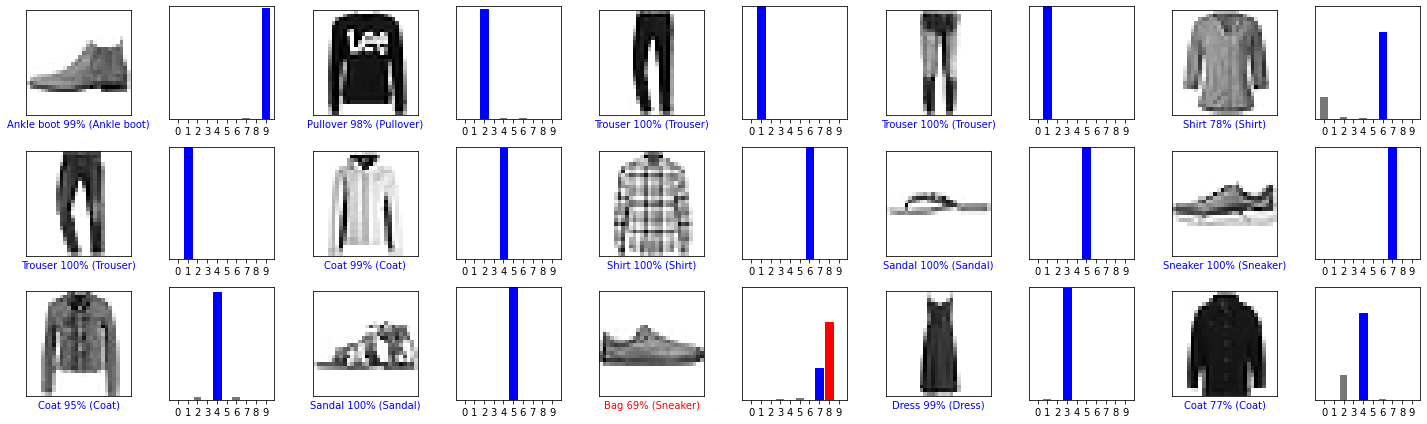

In [16]:
num_rows = int(N/5)
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, y_pred[i], test_labels, test_imagesi)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, y_pred[i], test_labels)
plt.tight_layout()
plt.show()

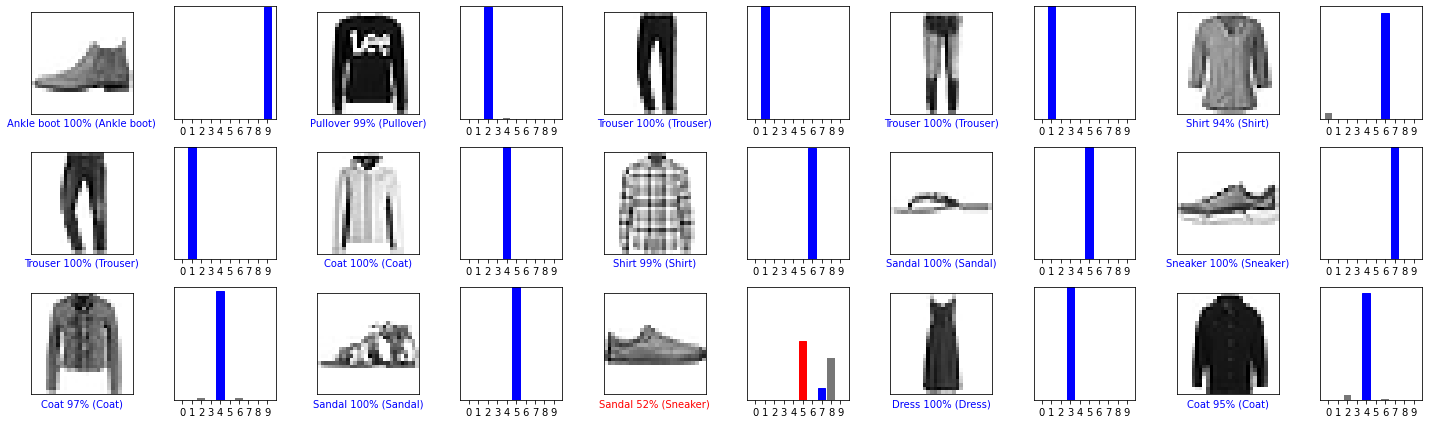

In [17]:
num_rows = int(N/5)
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, y_pred_opti[i], test_labels, test_imagesi)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, y_pred_opti[i], test_labels)
plt.tight_layout()
plt.show()

In [19]:
import pandas as pd
pd.DataFrame.from_dict(accuracy_di, orient="index", columns=["accuracy"])

,accuracy
64 neurons,0.89
128 neurons,0.90
256 neurons,0.89
SGD,0.87
RMSProp,0.89
adam,0.89
NAdam,0.89
2 layers,0.89
3 layers,0.89
5 layers,0.89


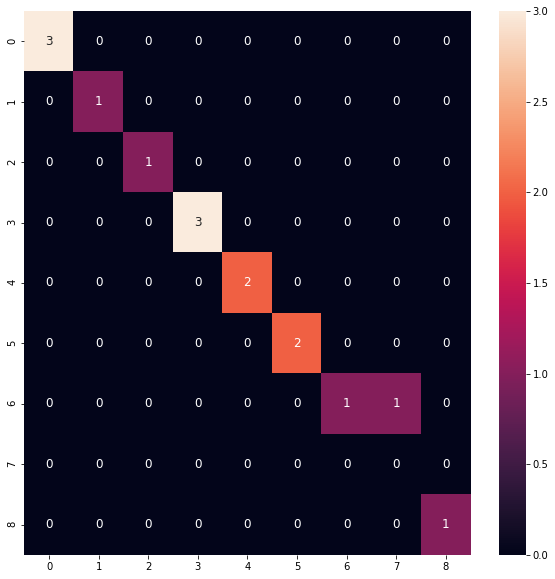

---------------------------------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.50      1.00      0.67         1
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         1

    accuracy                           0.93        15
   macro avg       0.83      0.89      0.85        15
weighted avg       0.90      0.93      0.91        15



In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
 
cm = confusion_matrix(test_labels[:N], np.argmax(y_pred, axis=1))
cm = pd.DataFrame(cm)
plt.figure(figsize = (10, 10))

sns.heatmap(cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()
print("---------------------------------------------------------")
print(classification_report(np.argmax(y_pred, axis=1), test_labels[:N], zero_division=0))

Вывод: После достижения уровня точности ~0.9 изминение числа нейронов, слоев и оптимизаторов не дают дополнительной точности валидационному тесту. 